На области определения функции f (x) = arccos(x) построить ее 
интерполянт по 4 точкам с максимальной точностью. Какую сетку Вам 
следует использовать?

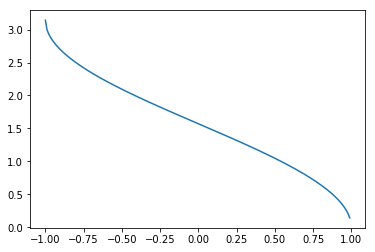

In [6]:
#Построим график функции на ее области определения [-1,1]
import numpy as np
%matplotlib inline
from matplotlib import pylab as plt
from math import acos
x = np.arange(-1,1,0.01)
y = []
for i in x:
    yi = acos(i)
    y.append(yi)
plt.plot(x, y)
plt.show()

Узлами интерполяции выберем корни полинома Чебышева:
x_k = (a+b)/2 + (b-a)/2 * cos(pi*(2k-1)/2n)
m = 1,2,...n  n = количество узлов
[a,b] - отрезок, на котором определена функция

In [13]:
from math import cos
from cmath import pi
a = -1
b = 1
xint = []
yint = []
for i in range(1,5):
    x_i = (a+b)/2. + (b-a)/2. * cos(pi*(2*i-1)/8.)
    y_i = acos(x_i)
    xint.append(x_i)
    yint.append(y_i)
print xint, yint

[0.9238795325112867, 0.38268343236508984, -0.3826834323650897, -0.9238795325112867] [0.3926990816987242, 1.1780972450961724, 1.9634954084936207, 2.748893571891069]


In [14]:
#интерполируем каноническим многочленом 3-ей степени
A = np.array([[1., xint[0], xint[0]**2, xint[0]**3],[1., xint[1], xint[1]**2, xint[1]**3], [1., xint[2], xint[2]**2, xint[2]**3], [1., xint[3], xint[3]**2, xint[3]**3]])
b = np.array(yint)
from scipy.linalg import solve
slv = solve(A,b)

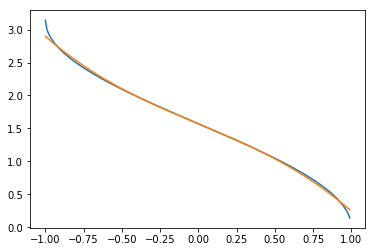

In [15]:
#нарисуем графики и сравним
x = np.arange(-1,1,0.01)
y = []
for i in x:
    yi = acos(i)
    y.append(yi)
yint = slv[0]+slv[1]*x+slv[2]*x*x+slv[3]*x*x*x
plt.plot(x, y)
plt.plot(x,yint)
plt.show()

In [18]:
#посчитаем ошибку интерполяции как максимальное уклонение полинома от исходной функции на выбранном промежутке 
#E_n(x) = max|f(x)-P_n(x)|
x = np.arange(-1,1,0.01)
maximum = 0
from math import fabs
for i in x:
    E_n = fabs(acos(i)-(slv[0]+slv[1]*i+slv[2]*i*i+slv[3]*i*i*i))
    if maximum < E_n:
        maximum  = E_n
print maximum

0.244065308876
